In [3]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import os
import json
import seaborn as sns
import warnings
from scipy import stats

# seeding
np.random.seed(0)

# Ignore warnings
warnings.filterwarnings('ignore')

In [4]:
import sys
sys.path.insert(0, '../src/data')

# modularized imports
from data_loader import load_config, load_data

config = load_config()
data_path = config['data_path']
df = load_data(data_path)

In [5]:
# unique id, L{lab}, M{mouseID}
df['unique_id'] = df['lab'].astype(str) + '_' + df['mouseID'].astype(str)
df['unique_id'] = df['unique_id'].astype('category').cat.codes + 1
df.head()

,slowdelta,fastdelta,slowtheta,fasttheta,alpha,beta,rms,mouseID,lab,sleepstage,epoch,unique_id
0,0.286260,0.175425,0.207455,0.125388,0.108024,0.058404,0.338769,1.0,1.0,3.0,1.0,1
1,0.238637,0.121246,0.174037,0.067707,0.070327,0.040197,0.248721,1.0,1.0,3.0,2.0,1
2,0.121714,0.290182,0.313687,0.087330,0.092042,0.071340,0.228859,1.0,1.0,3.0,3.0,1
3,0.090216,0.104930,0.454057,0.256769,0.107563,0.061333,0.211976,1.0,1.0,1.0,6.0,1
4,0.090192,0.104901,0.644949,0.082334,0.065495,0.055760,0.209134,1.0,1.0,1.0,7.0,1


In [4]:
# EEG features
eeg_features = ['slowdelta', 'fastdelta', 'slowtheta', 'fasttheta', 'alpha', 'beta', 'rms']

# sleep stages
# 1 = REM 
# 2 = WAKE
# 3 = NREM

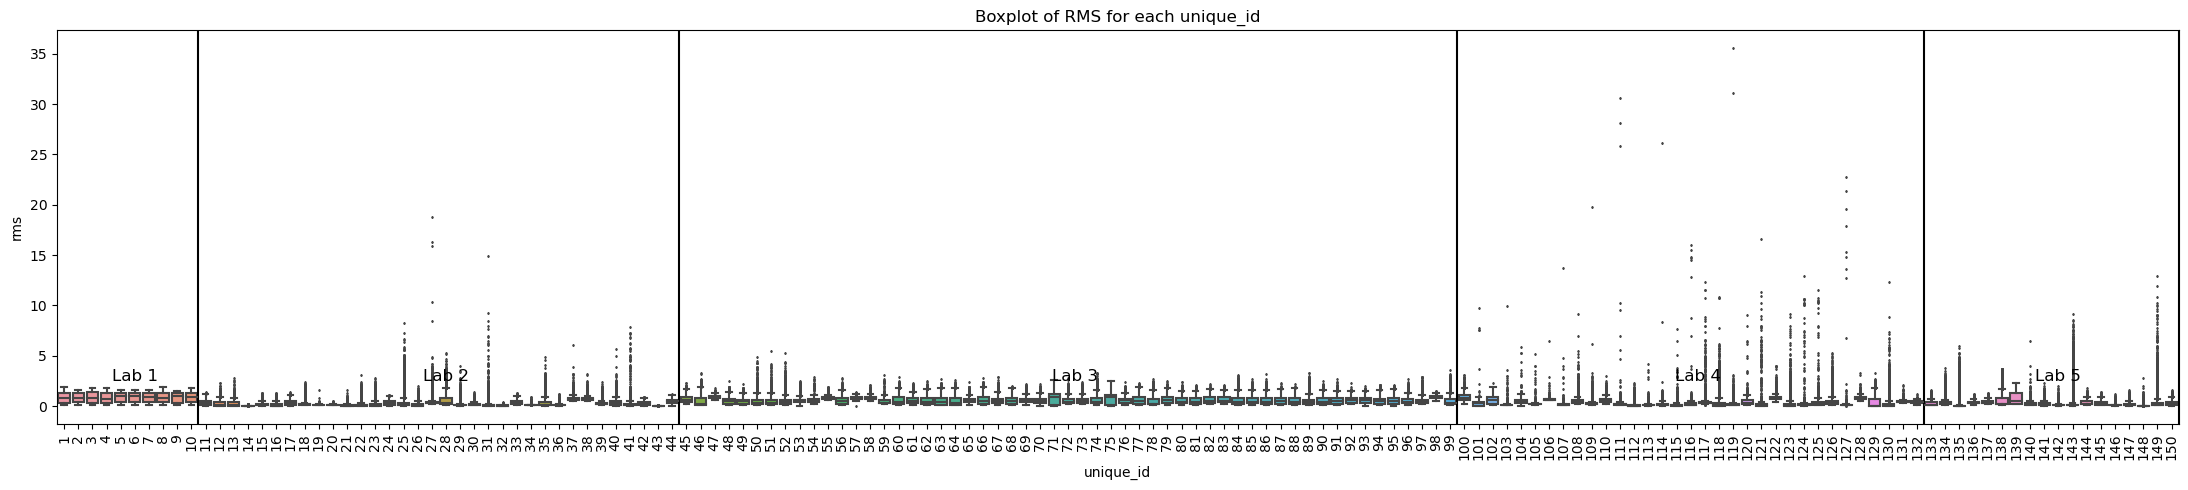

In [5]:
plt.figure(figsize=(22, 5))
sns.boxplot(x='unique_id', y='rms', data=df, fliersize=1)
labindex = np.array(df.groupby('lab')['mouseID'].nunique())
labindex_cum = np.cumsum(labindex)
for i in range(len(labindex_cum)):
    plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
    plt.text(labindex_cum[i]-labindex[i]/2, 2.5, 'Lab ' + str(i+1), fontsize=12, ha='center')
plt.title('Boxplot of RMS for each unique_id')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

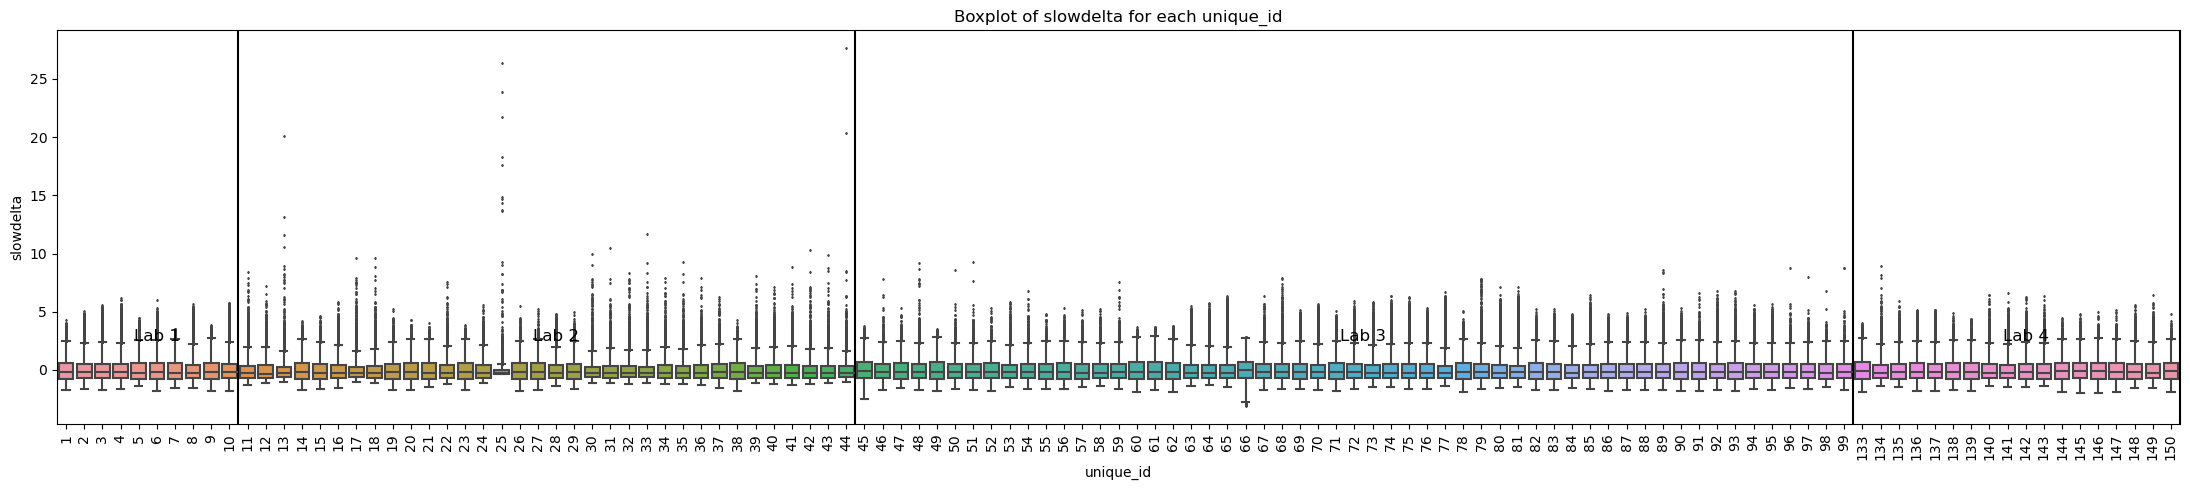

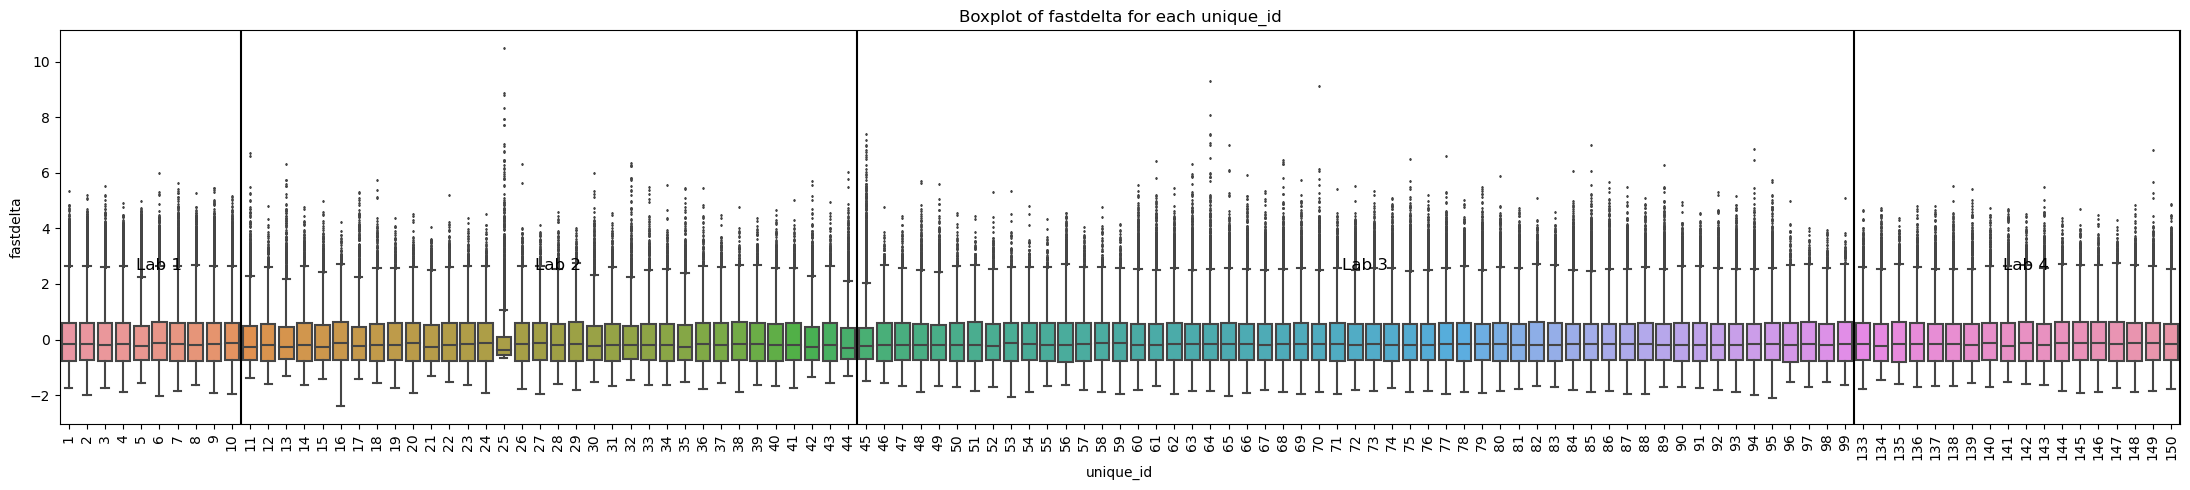

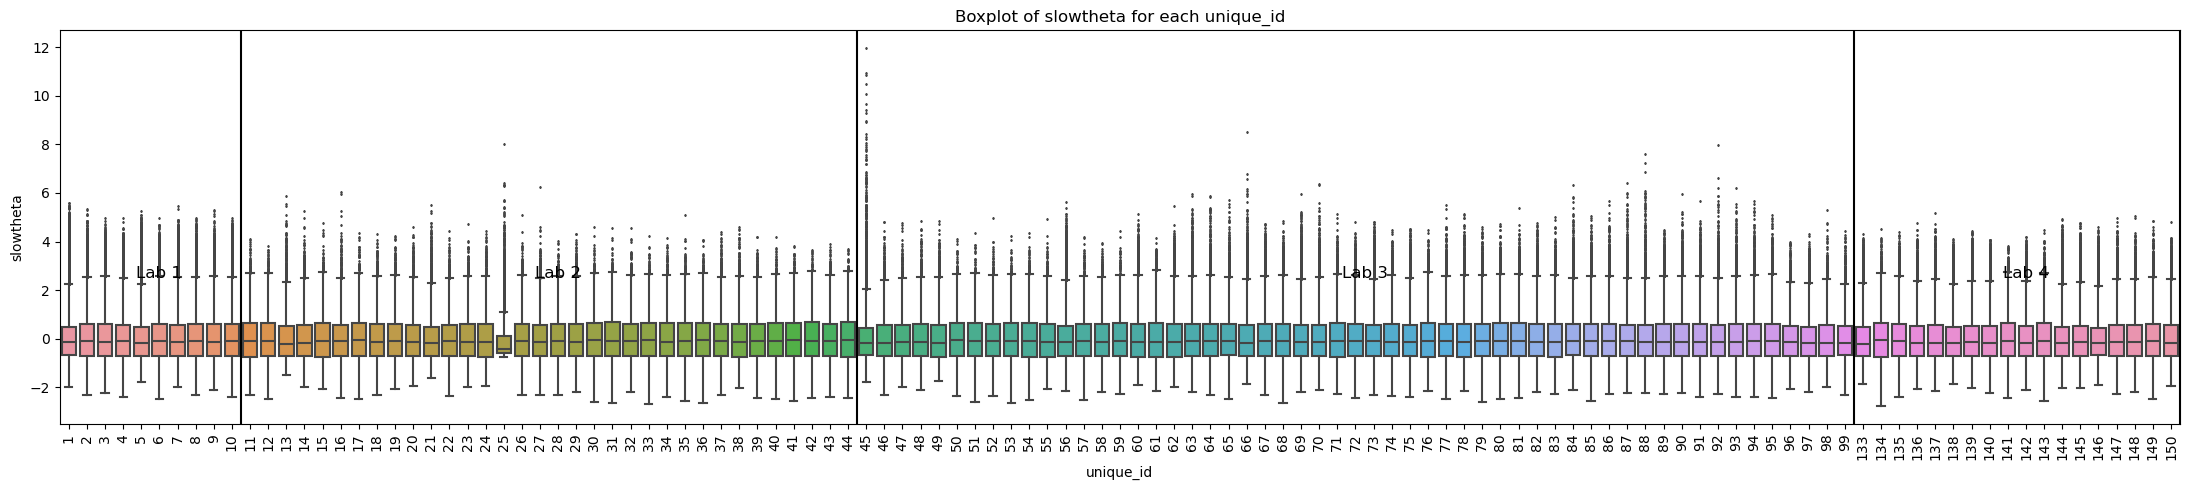

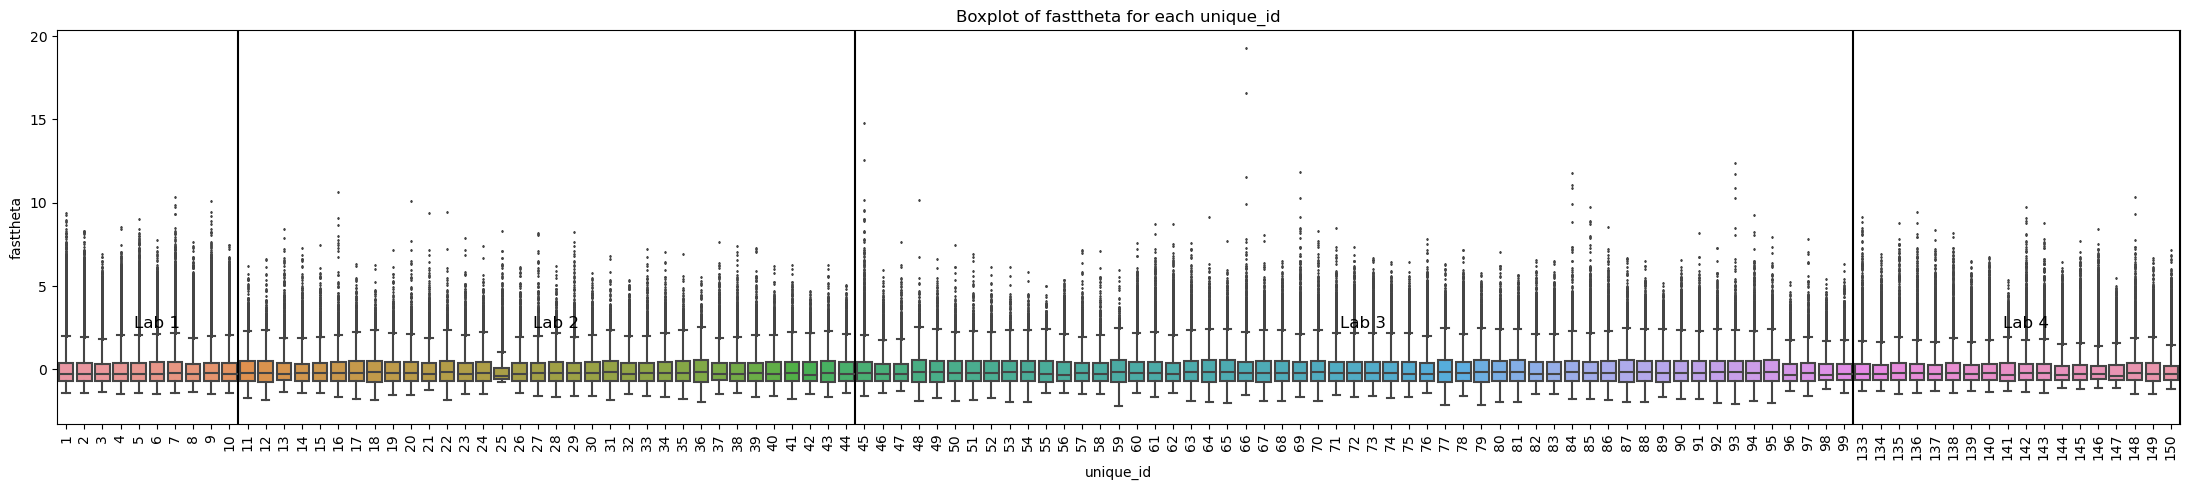

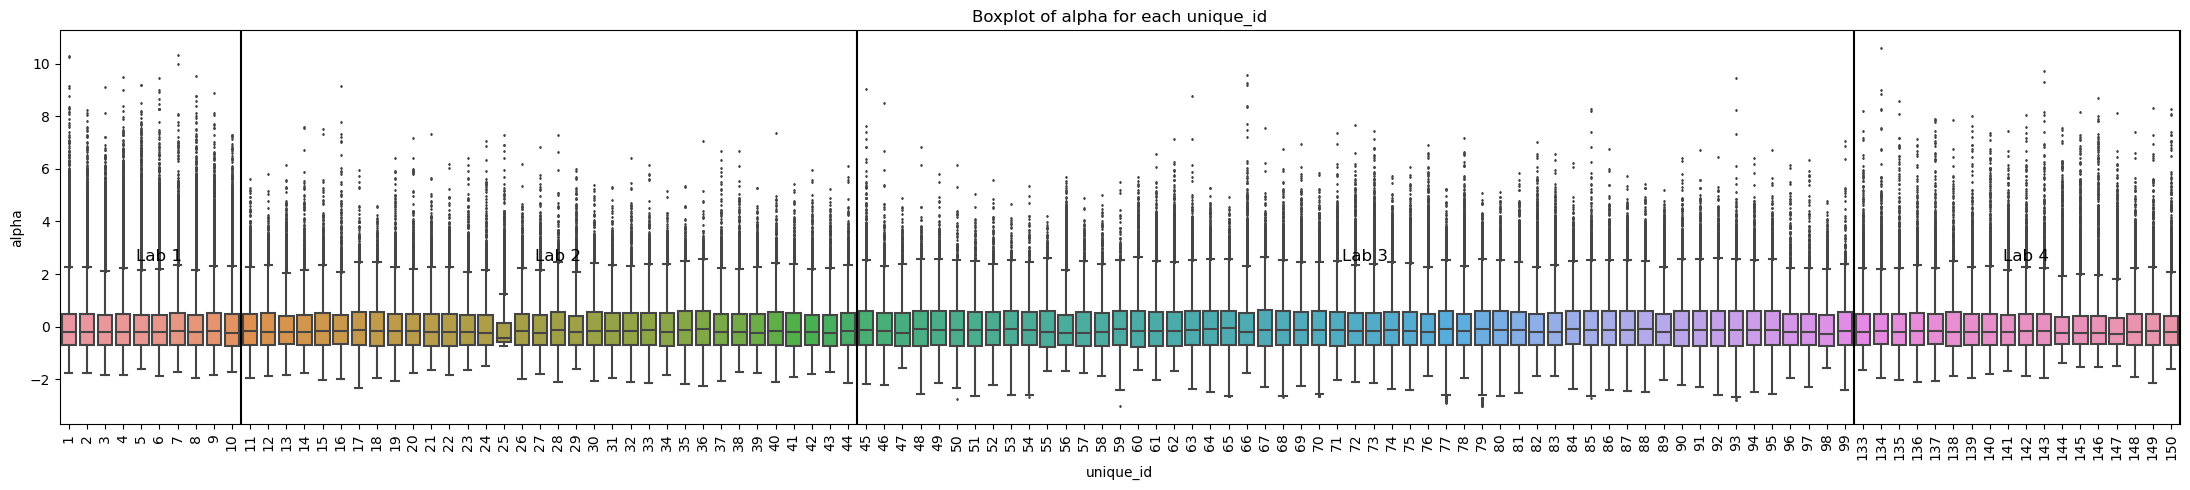

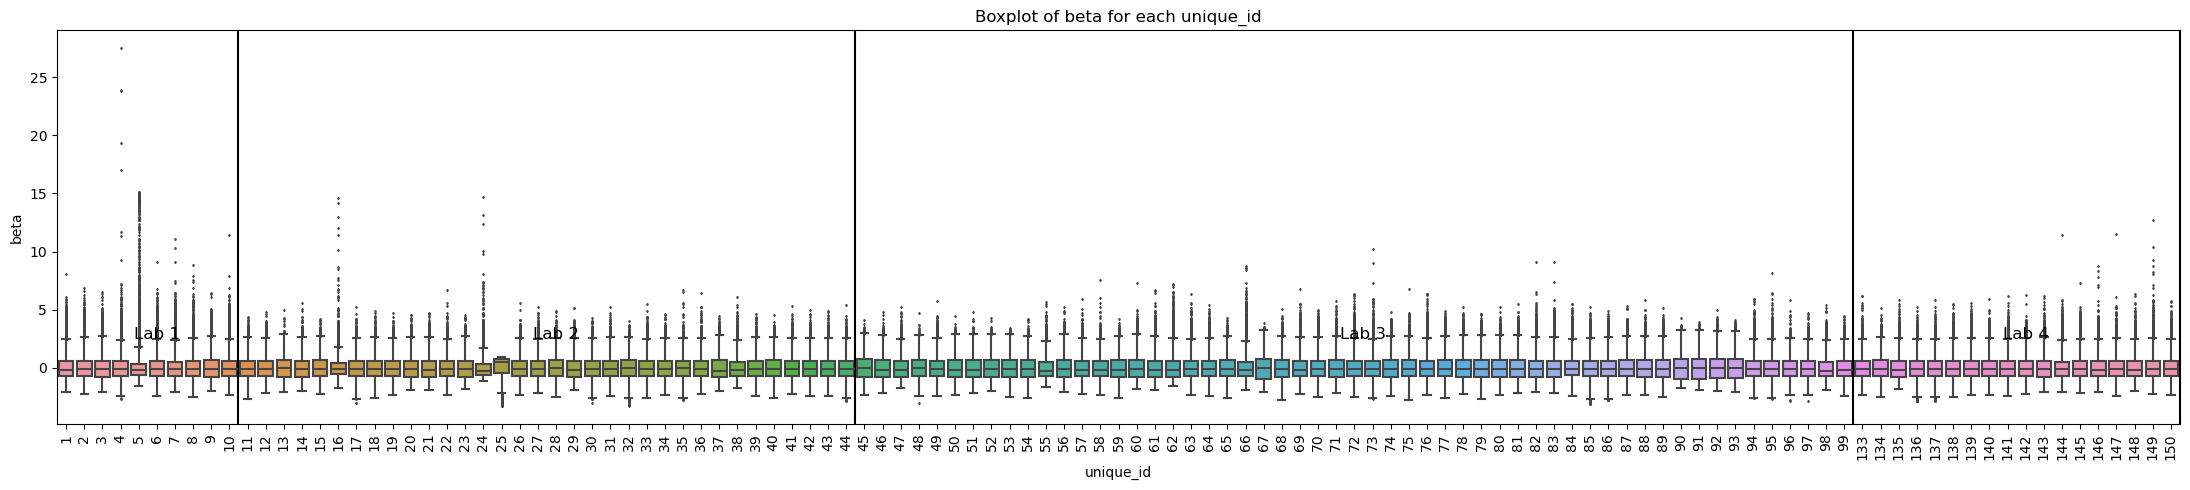

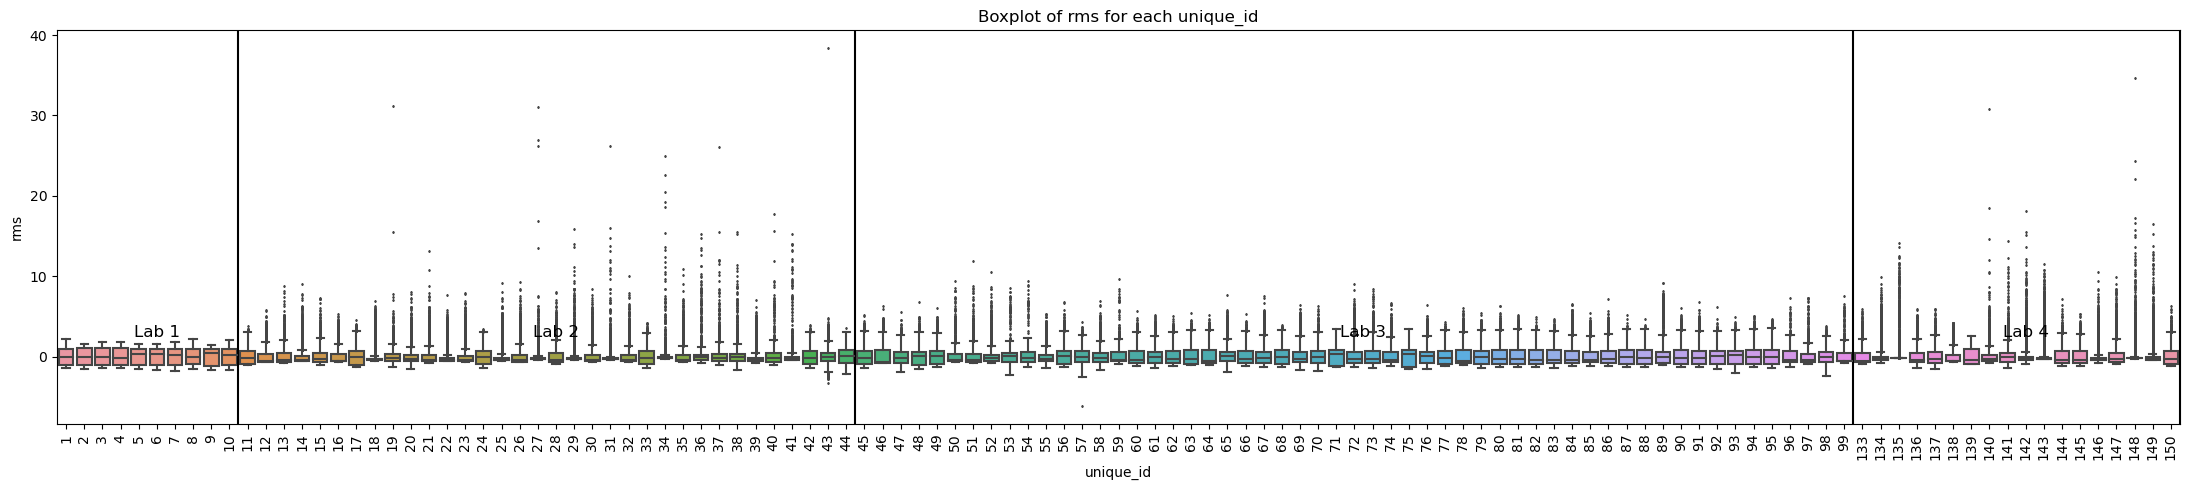

In [18]:
from sklearn.preprocessing import StandardScaler

# Assuming 'lab' is the column that contains the lab information
df_standardized = df[df['lab'] != 4.0]

#df_standardized = df.copy()

# Initialize a new StandardScaler instance
scaler = StandardScaler()

# Loop over each unique mouse
for mouse in df_standardized['unique_id'].unique():
    # Select data for the current mouse
    mouse_data = df_standardized[df_standardized['unique_id'] == mouse]
    # Standardize each EEG feature for the current mouse
    for feature in eeg_features:
        # Fit the scaler and transform the data
        df_standardized.loc[mouse_data.index, feature] = scaler.fit_transform(mouse_data[[feature]])

# Loop over each EEG feature
for feature in eeg_features:
    plt.figure(figsize=(22, 5))
    sns.boxplot(x='unique_id', y=feature, data=df_standardized, fliersize=1)
    labindex = np.array(df_standardized.groupby('lab')['unique_id'].nunique())
    labindex_cum = np.cumsum(labindex)
    for i in range(len(labindex_cum)):
        plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
        plt.text(labindex_cum[i]-labindex[i]/2, 2.5, 'Lab ' + str(i+1), fontsize=12, ha='center')
    plt.title(f'Boxplot of {feature} for each unique_id')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

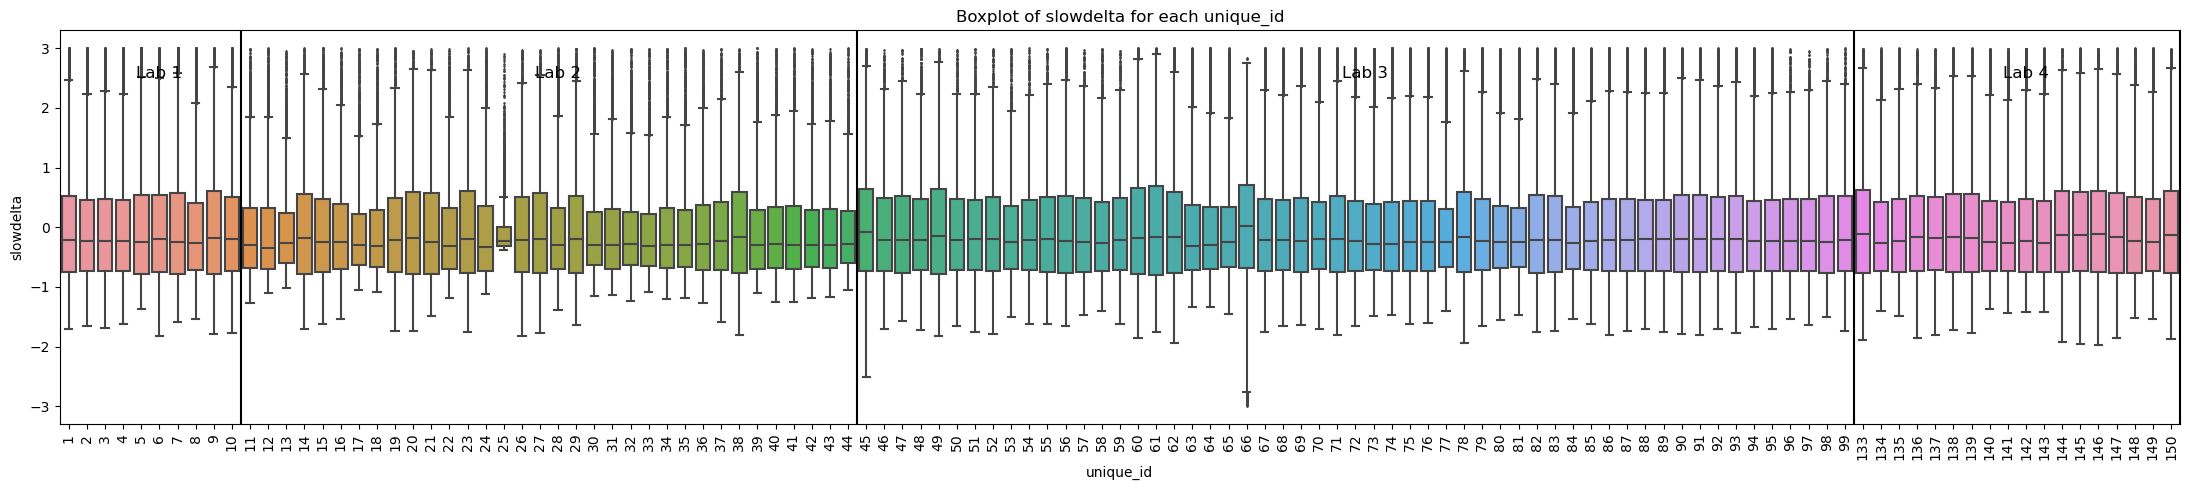

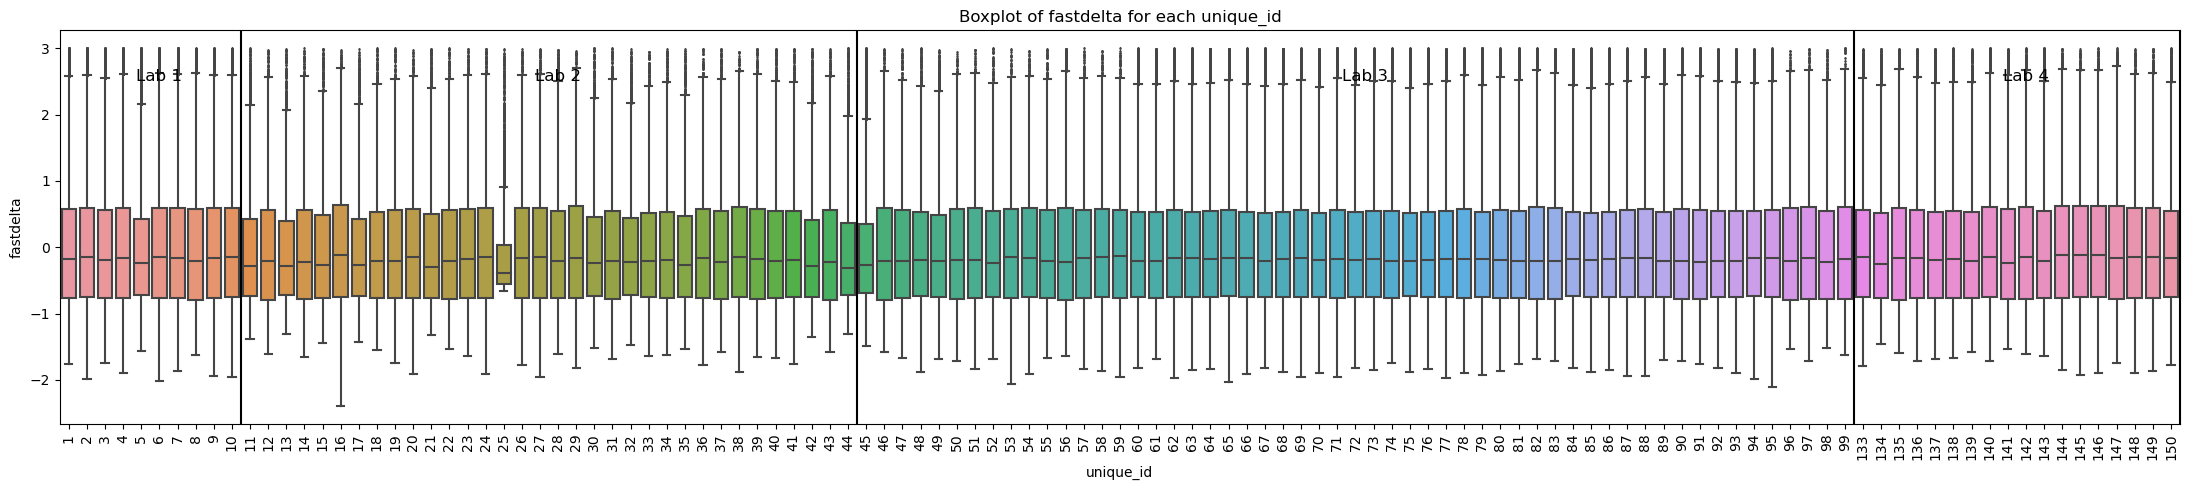

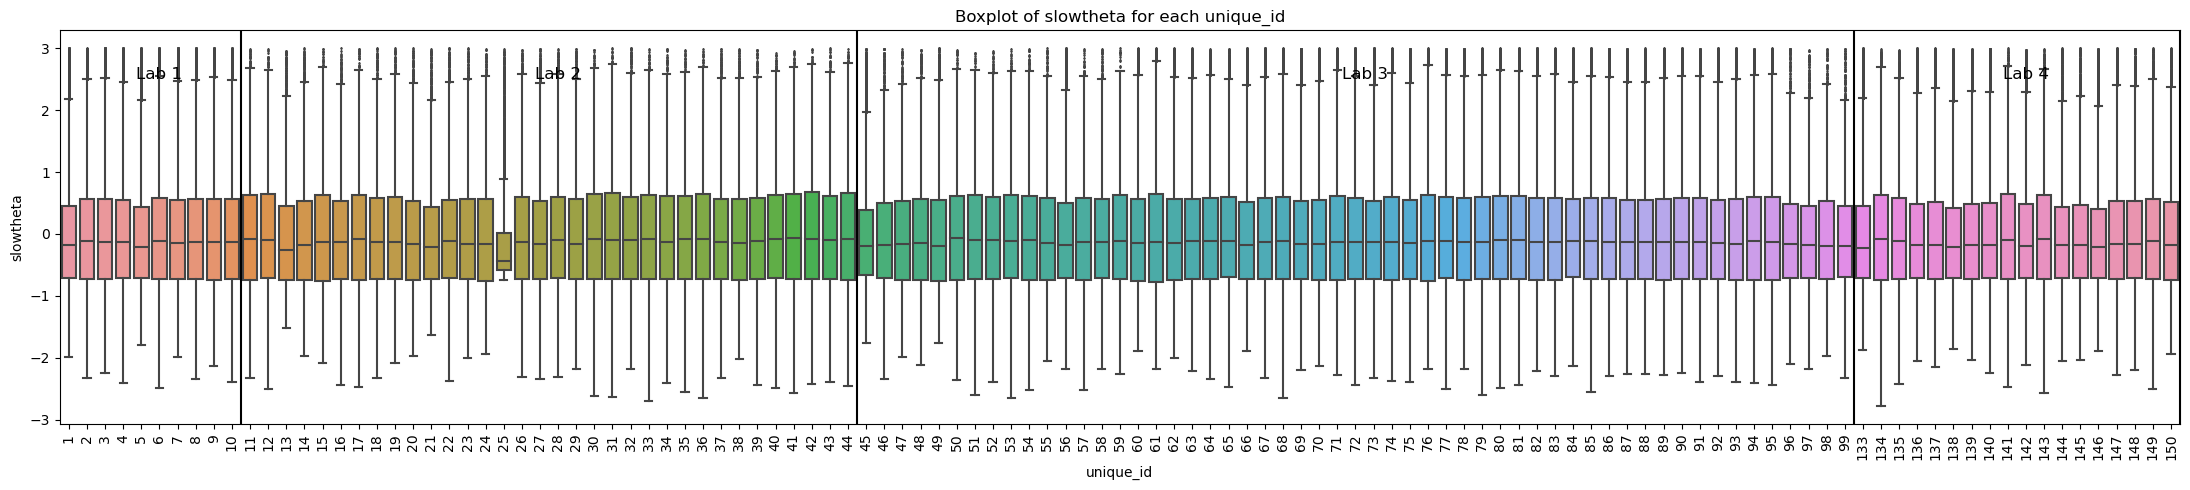

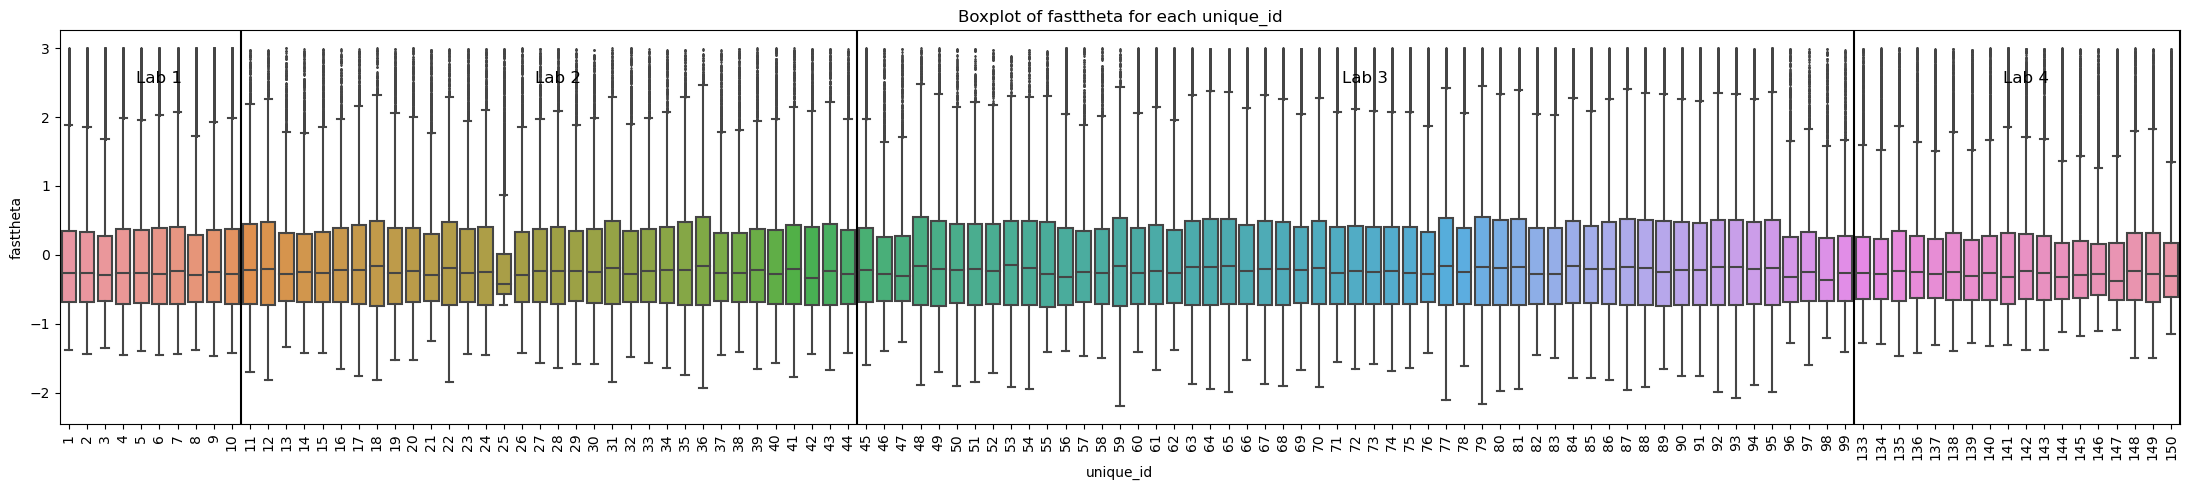

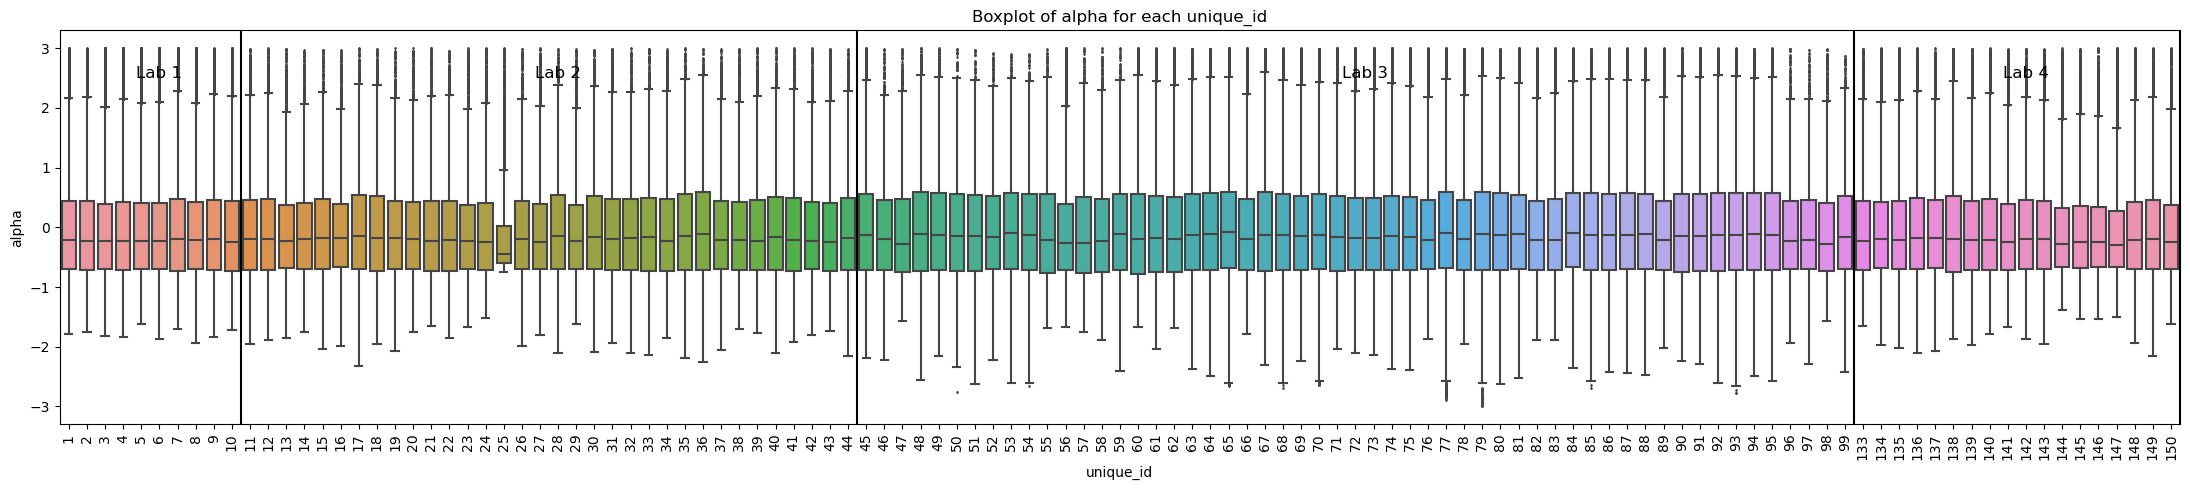

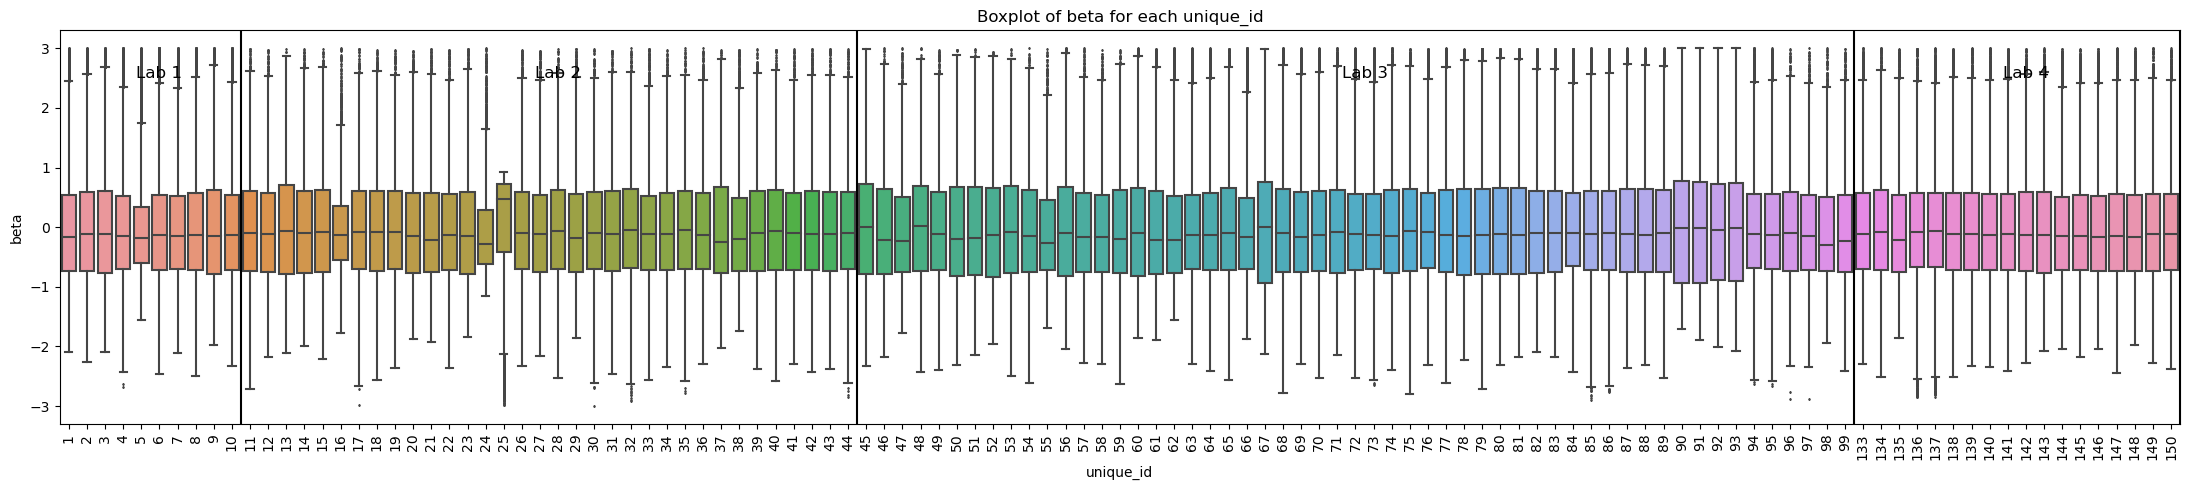

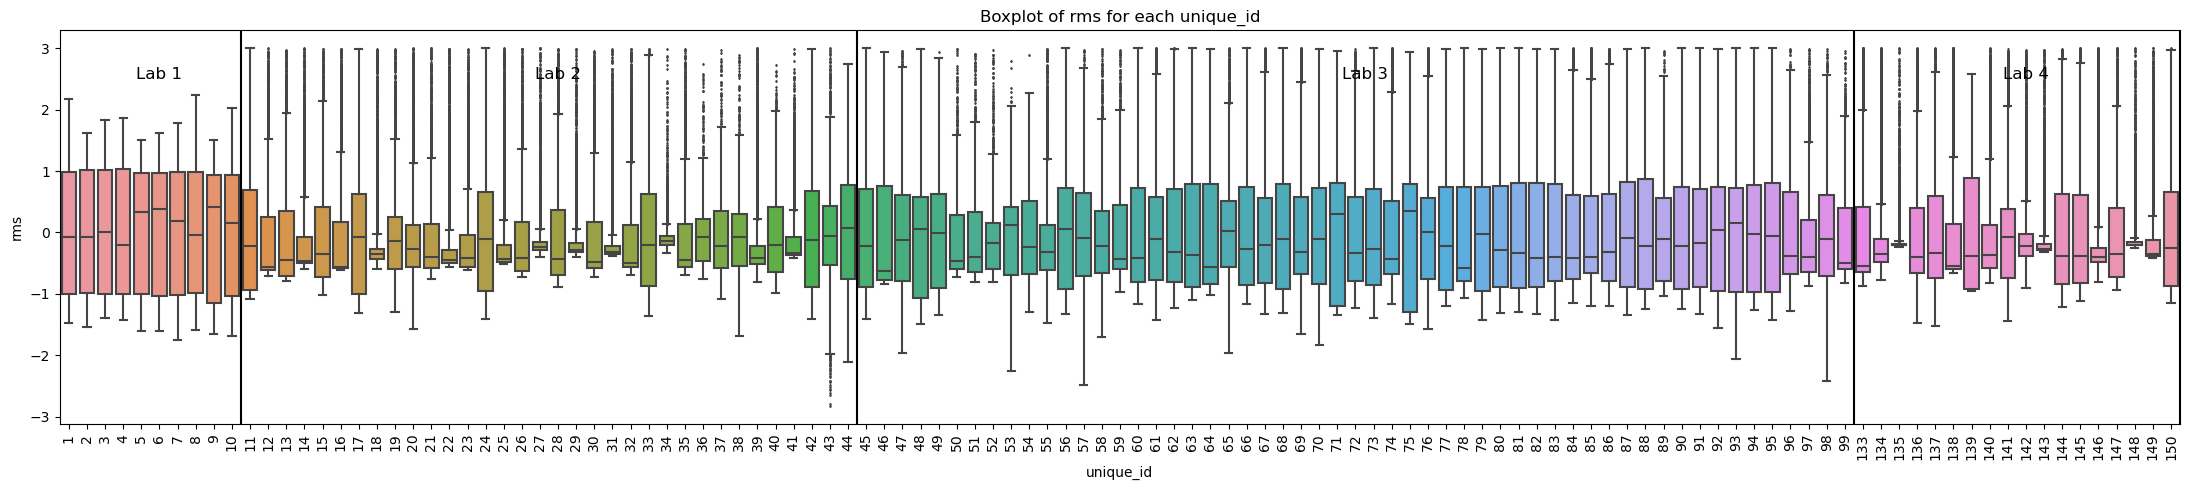

In [19]:
# Create a copy of the standardized DataFrame
df_standardized_3std = df_standardized.copy()

# Loop over each unique mouse
for mouse in df_standardized_3std['unique_id'].unique():
    # Select data for the current mouse
    mouse_data = df_standardized_3std[df_standardized_3std['unique_id'] == mouse]
    # Remove data points that are more than 3 standard deviations away from the mean for each EEG feature
    for feature in eeg_features:
        df_standardized_3std.loc[mouse_data.index, feature] = mouse_data[feature][np.abs(mouse_data[feature] - mouse_data[feature].mean()) <= 3 * mouse_data[feature].std()]

# Loop over each EEG feature
for feature in eeg_features:
    plt.figure(figsize=(22, 5))
    sns.boxplot(x='unique_id', y=feature, data=df_standardized_3std, fliersize=1)
    labindex = np.array(df_standardized_3std.groupby('lab')['unique_id'].nunique())
    labindex_cum = np.cumsum(labindex)
    for i in range(len(labindex_cum)):
        plt.axvline(labindex_cum[i]-0.5, color='black', linestyle='-')
        plt.text(labindex_cum[i]-labindex[i]/2, 2.5, 'Lab ' + str(i+1), fontsize=12, ha='center')
    plt.title(f'Boxplot of {feature} for each unique_id')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

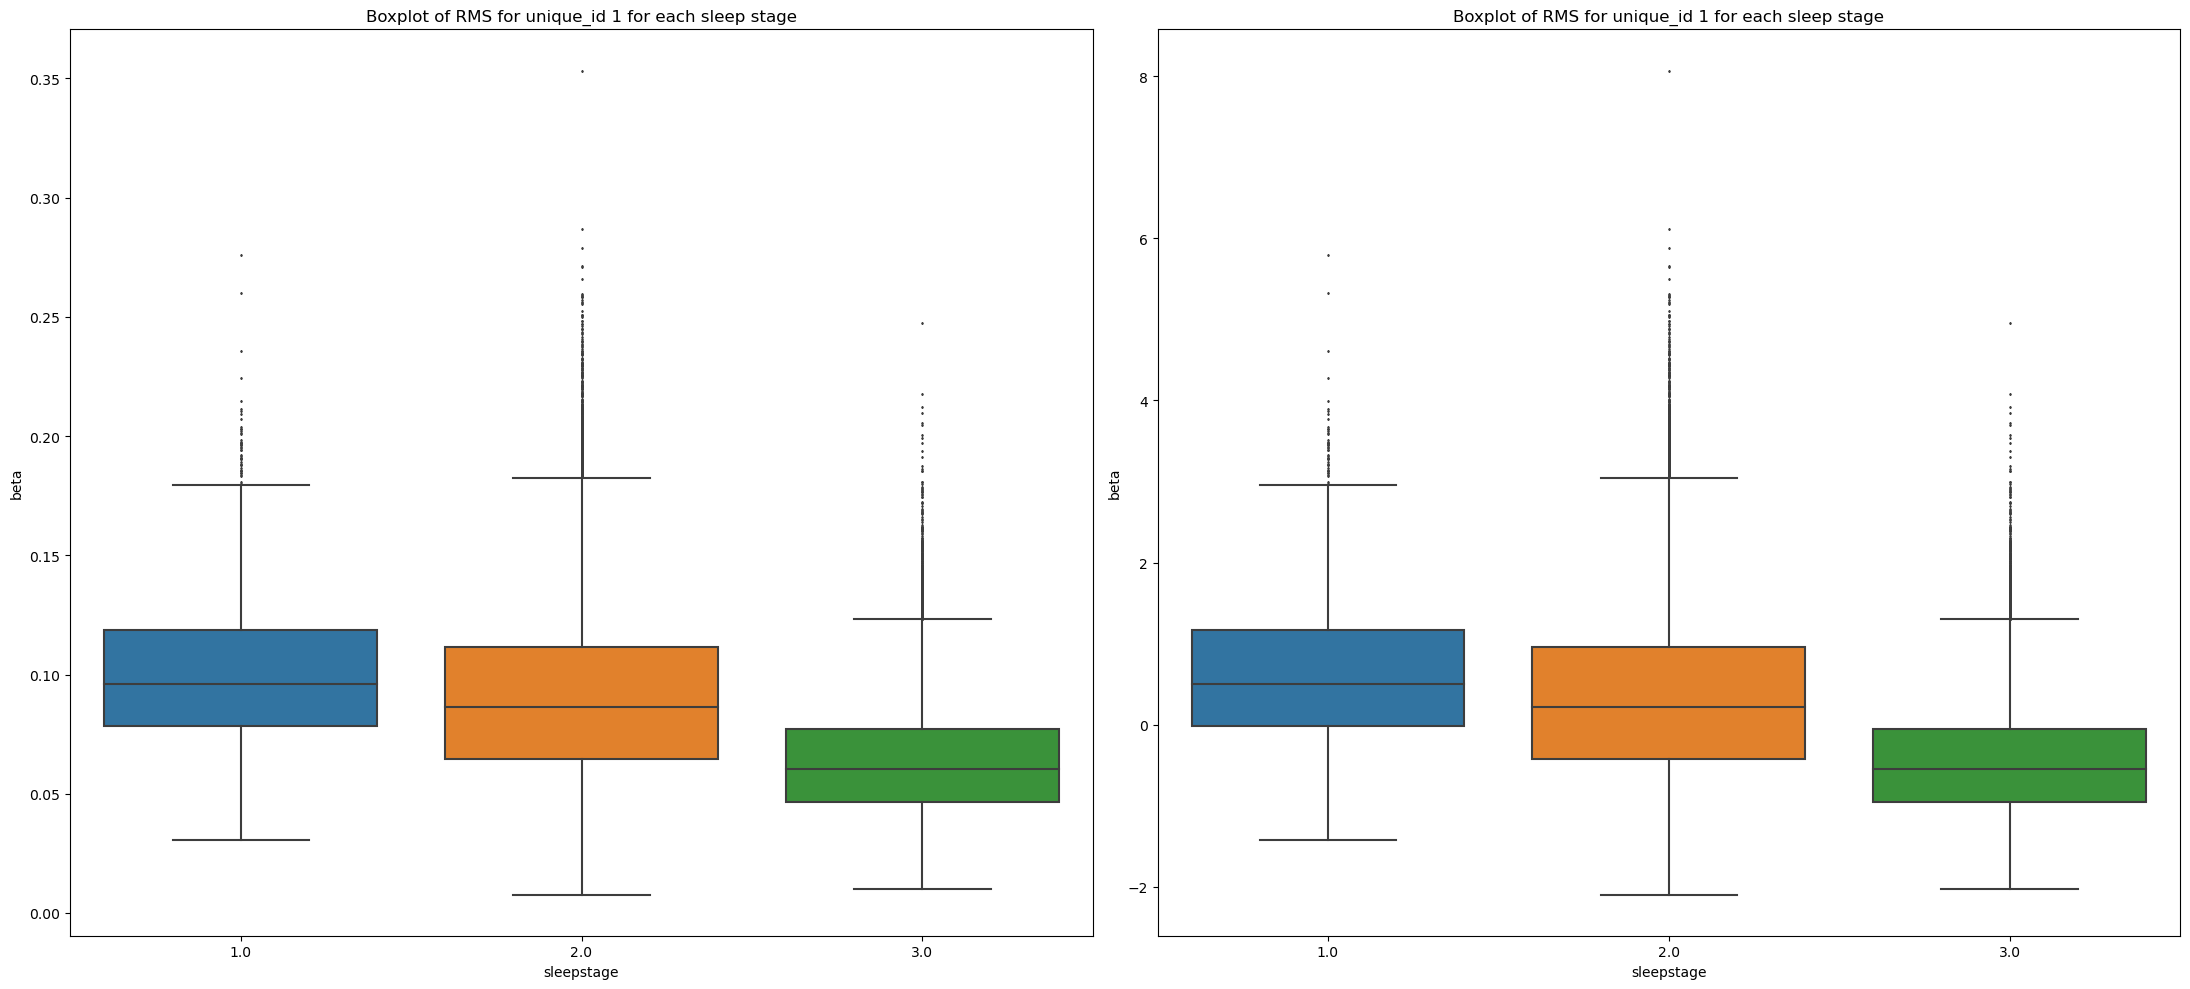

In [14]:
plt.figure(figsize=(22, 10))

# First subplot left
plt.subplot(1, 2, 1)
sns.boxplot(x = "sleepstage", y='beta', data=df[df['unique_id'] == 1], fliersize=1)
plt.title('Boxplot of RMS for unique_id 1 for each sleep stage')

# Second subplot right
plt.subplot(1, 2, 2)
sns.boxplot(x = "sleepstage", y='beta', data=df_standardized[df_standardized['unique_id'] == 1], fliersize=1)
plt.title('Boxplot of RMS for unique_id 1 for each sleep stage')

plt.tight_layout()
plt.show()